# AMAZON DIWALI PRODUCT SALES 2025 ANALYSIS

## PROJECT OVERVIEW


This dataset represent Amazon Diwali India sales for the year 2025. It is an e-commerce transaction that captures the purchasing behaviour of custumers, product preferences, payment preferences, and feedback patterns across various product categories. The aim of this project is to analyze a 15,000 transactions to find insights like:
 1. Top-selling product categories and revenue trends.
 2. Customer purchasing patterns and payment types.
 3. Customer Retention
 4. Customer satisfactions.


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("=" * 150)
print("\n" + " Libraries Imported Successfully ")
print("\n" + "=" * 150)


 Libraries Imported Successfully 



#### Load Data

In [145]:
df = pd.read_csv(r"C:\Users\BOOK 2\Desktop\Data Analysis Projects\Amazon India\amazon_sales_2025_INR.csv")

print("\n" + "Sample of the Data")
print("-" * 150)
display(df.head(10))
print("=" * 150)
print(f" Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f" Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "  Imported Successfully ")
print("\n" + "=" * 150)


Sample of the Data
------------------------------------------------------------------------------------------------------------------------------------------------------


,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India
5,ORD100005,2025-02-10,CUST2403,Home & Kitchen,Cookware Set,1,12195.41,12195.41,Cash on Delivery,Delivered,5,Fantastic quality!,Maharashtra,India
6,ORD100006,2025-05-16,CUST9645,Clothing,Jeans,4,47353.06,189412.24,Cash on Delivery,Delivered,2,Poor packaging,Arunachal Pradesh,India
7,ORD100007,2025-08-13,CUST9479,Clothing,Sneakers,4,49758.44,199033.76,Cash on Delivery,Delivered,3,Okay product,Andhra Pradesh,India
8,ORD100008,2025-04-28,CUST4608,Clothing,T-Shirt,3,1247.51,3742.53,UPI,Delivered,5,Excellent product!,Assam,India
9,ORD100009,2025-09-21,CUST4899,Clothing,T-Shirt,1,43009.84,43009.84,Debit Card,Returned,1,Terrible experience,Gujarat,India


 Dataset Shape: 15000 rows × 14 columns
 Memory Usage: 8.79 MB

  Imported Successfully 



## DATA CLEANING 

### Data Information

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          15000 non-null  object 
 1   Date              15000 non-null  object 
 2   Customer_ID       15000 non-null  object 
 3   Product_Category  15000 non-null  object 
 4   Product_Name      15000 non-null  object 
 5   Quantity          15000 non-null  int64  
 6   Unit_Price_INR    15000 non-null  float64
 7   Total_Sales_INR   15000 non-null  float64
 8   Payment_Method    15000 non-null  object 
 9   Delivery_Status   15000 non-null  object 
 10  Review_Rating     15000 non-null  int64  
 11  Review_Text       15000 non-null  object 
 12  State             15000 non-null  object 
 13  Country           15000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.6+ MB


#### Change date datatype

In [147]:
df['Date'] = pd.to_datetime(df['Date'])

print("=" * 150)
print("\n" + "Date Datatype changed successfully!!")
print("\n" + "=" * 150)


Date Datatype changed successfully!!



#### Create New Columns

In [148]:
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

print("=" * 150)
print("\n" + " Month and Day columns successfully created")
print("\n" + "=" * 150)


 Month and Day columns successfully created



### Checking for Duplicates

In [149]:
display(df.duplicated())

print("=" * 150)
duplicates = df.duplicated().sum()
dup_order_ids = df['Order_ID'].duplicated().sum()
print(f" Number of Duplicates: {duplicates}")
print(f" Duplicate Order IDs: {dup_order_ids}")
print(f" {'No duplicates found!!!' if duplicates == 0 else ' Duplicates need attention!!!'}")
print("=" * 150)

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

 Number of Duplicates: 0
 Duplicate Order IDs: 0
 No duplicates found!!!


### Checking for Null or Missing Values

In [150]:
display(df.isnull().sum())

print("\n" + "=" * 150)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_pct.values
}).sort_values('Missing_Count', ascending=False)

if missing_df['Missing_Count'].sum() == 0:
    print("   Perfect! No missing values detected ")
else:
    print(missing_df[missing_df['Missing_Count'] > 0])
print("=" * 150 + "\n")

Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
Review_Text         0
State               0
Country             0
Month               0
Day                 0
dtype: int64


   Perfect! No missing values detected 



### Drop Columns not needed

In [151]:
df.drop(columns = "Country", inplace =True) #This dataset is for Amazon Sales in India so Country coloumn is not needed 

display(df)
print("\n" + "=" * 150)
print("Country Column dropped successfully")
print("=" * 150)

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Month,Day
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,January,Saturday
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,August,Thursday
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,February,Thursday
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,February,Monday
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,June,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ORD114995,2025-04-12,CUST2822,Beauty,Lipstick,4,36421.54,145686.16,UPI,Delivered,1,Never buying again,Gujarat,April,Saturday
14996,ORD114996,2025-08-29,CUST6143,Beauty,Shampoo,4,18158.02,72632.08,Debit Card,Delivered,4,Satisfied with the product,Meghalaya,August,Friday
14997,ORD114997,2025-01-27,CUST6747,Books,Science Textbook,1,38864.05,38864.05,UPI,Delivered,1,Waste of money,Sikkim,January,Monday
14998,ORD114998,2025-06-21,CUST2748,Beauty,Hair Dryer,3,32658.62,97975.86,Cash on Delivery,Pending,3,Okay product,Himachal Pradesh,June,Saturday



Country Column dropped successfully


## EXECUTIVE SUMMARY METRICS

In [152]:
# === CUSTOMER BEHAVIOUR FEATURES ===


# Created a new table to show the number of orders each customer placed and their lifetime value
customer_stats = df.groupby('Customer_ID').agg({
    'Order_ID': 'count',
    'Total_Sales_INR': 'sum'
}).rename(columns = {'Order_ID': 'Customer_Order_Count', 'Total_Sales_INR': 'Customer_Lifetime_Value'})
df = df.merge(customer_stats, on ='Customer_ID', how ='left') 

# This is to count the number of customer with more than one orders in the peroid
df['Repeated_Customer'] = (df['Customer_Order_Count'] > 1).astype(int) 

# Rating categories
df['RatingCategory'] = pd.cut(df['Review_Rating'],
                                bins=[0, 2, 3, 4, 5],
                                labels=[ 'Poor', 'Average', 'Good', 'Excellent'])

df

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Month,Day,Customer_Order_Count,Customer_Lifetime_Value,Repeated_Customer,RatingCategory
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,January,Saturday,3,120267.10,1,Poor
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,August,Thursday,3,50569.98,1,Excellent
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,February,Thursday,4,282208.42,1,Average
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,February,Monday,6,618392.97,1,Excellent
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,June,Sunday,2,233831.92,1,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ORD114995,2025-04-12,CUST2822,Beauty,Lipstick,4,36421.54,145686.16,UPI,Delivered,1,Never buying again,Gujarat,April,Saturday,1,145686.16,0,Poor
14996,ORD114996,2025-08-29,CUST6143,Beauty,Shampoo,4,18158.02,72632.08,Debit Card,Delivered,4,Satisfied with the product,Meghalaya,August,Friday,1,72632.08,0,Good
14997,ORD114997,2025-01-27,CUST6747,Books,Science Textbook,1,38864.05,38864.05,UPI,Delivered,1,Waste of money,Sikkim,January,Monday,1,38864.05,0,Poor
14998,ORD114998,2025-06-21,CUST2748,Beauty,Hair Dryer,3,32658.62,97975.86,Cash on Delivery,Pending,3,Okay product,Himachal Pradesh,June,Saturday,5,340942.63,1,Average


In [188]:

# === CALCULATE KEY METRICS ===

print("=" * 70)
print(f"{'EXECUTIVE SUMMARY METRICS':^70}")
print("=" * 70)

total_sales = df['Total_Sales_INR'].sum()
total_orders = df['Order_ID'].count()
avg_order_value = total_sales / total_orders #measures the average amount spent by customers per transaction
total_qty_sold = df['Quantity'].sum()
total_category = df['Product_Category'].nunique()
total_products = df['Product_Name'].nunique()
total_customers = df['Customer_ID'].nunique()
total_markets = df['State'].nunique()
return_customers = df[df['Repeated_Customer'] == 1]['Customer_ID'].nunique()
delivered = (df['Delivery_Status'] == 'Delivered').sum()
pending = (df['Delivery_Status'] == 'Pending').sum()
returned = (df['Delivery_Status'] == 'Returned').sum()
avg_rating = df['Review_Rating' ].mean()
positive_rating = (df['Review_Rating'] >= 4).sum()
excellent_rating = (df['Review_Rating'] == 5).sum()
customer_defectors = (df['Review_Rating'] <= 2).sum() # Defectors are customers rating from 1-3
avg_sales_value = df['Customer_Lifetime_Value'].mean()



# === REVENUE METRICS ===
print("\n" + "REVENUE METRICS: ")
print("-" * 16)
print(f"{'Total Sales:':<35}{total_sales:>35,.2f}")
print(f"{'Average Order Value:':<35} {avg_order_value:>34,.2f}")
print(f"{'Sales Per Customer:' :<35} {total_sales / total_customers:>34,.2f}")
print(f"{'Sales Per Unit:' :<35} {total_sales / total_qty_sold:>34,.2f}")
print(f"{'Customer Lifetime Value (CLV):' :<35} {avg_sales_value: >34,.2f} ")


# === TRANSACTION METRICS ===
print("\n" + "TRANSACTION METRICS: ")
print("-" * 20)
print(f"{'Total Orders:':<35}{total_orders:>35,}")
print(f"{'Total Quantity Sold:':<35} {total_qty_sold:>34,}")
print(f"{'Number of Product Category:':<35} {total_category:>34,}")
print(f"{'Number of Products:':<35} {total_products:>34,}")  
print(f"{'Total Customers:':<35} {total_customers:>34,}")
print(f"{'Total States:':<35} {total_markets:>34,}")


print("\n" + "CUSTOMER SATISFACTION METRICS: ")
print("-" * 30)
print(f"{'Total Returning Customers:' :<35} {return_customers: >34,} ({return_customers / total_customers * 100:.2f}%)")
print(f"{'Total Delivered Orders:':<35} {delivered:>34,} ({delivered / total_orders * 100:.2f}%)")
print(f"{'Total Pending Orders:':<35} {pending:>34,} ({pending / total_orders * 100:.2f}%)")
print(f"{'Total Returned Orders:':<35} {returned:>34,} ({returned / total_orders * 100:.2f}%)")
print(f"{'Average Rating:':<35} {avg_rating:>29.2f}/5.00")
print(f"{'Positive Rating (≥4):':<35} {positive_rating: >34,} ({positive_rating / total_orders * 100:.2f}%)")
print(f"{'Excellent Rating (5):':<35} {excellent_rating: >34,} ({excellent_rating / total_orders * 100:.2f}%)")
print(f"{'Bad Rating:':<35} {customer_defectors: >34,} ({customer_defectors / total_orders * 100:.2f}%)")
print(f"{'Net Promoter Score (NPS):':<35} {positive_rating - customer_defectors: >34,} ({(positive_rating - customer_defectors) / total_orders * 100:,.2f}%)") # NPS measures how likely your customers would be willing to refer your products to others
print("\n" + "=" * 70)
print(f"{'Executive summary metrics complete':^70}")
print("=" * 70)

                      EXECUTIVE SUMMARY METRICS                       

REVENUE METRICS: 
----------------
Total Sales:                                          1,118,161,803.50
Average Order Value:                                         74,544.12
Sales Per Customer:                                         154,037.99
Sales Per Unit:                                              24,975.69
Customer Lifetime Value (CLV):                              201,666.75 

TRANSACTION METRICS: 
--------------------
Total Orders:                                                   15,000
Total Quantity Sold:                                            44,770
Number of Product Category:                                          5
Number of Products:                                                 25
Total Customers:                                                 7,259
Total States:                                                       28

CUSTOMER SATISFACTION METRICS: 
------------------------------
Tot

## EXPLORATORY DATA ANALYSIS

### Product Category Analysis

##### Total Orders per Product Category


TOTAL ORDERS PER PRODUCT CATEGORY TABLE


,Product_Category,Count
3,Electronics,3036
1,Books,3035
2,Clothing,3022
0,Beauty,2997
4,Home & Kitchen,2910


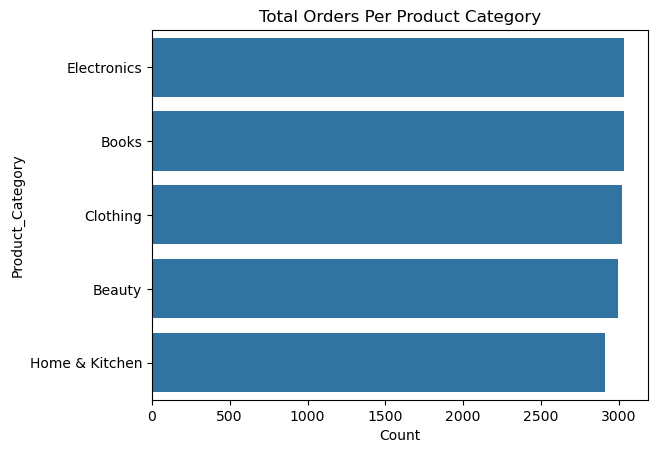

In [189]:
df2 = df.groupby('Product_Category', dropna = False)['Quantity'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)

print("\n" + "=" * 50)
print("TOTAL ORDERS PER PRODUCT CATEGORY TABLE")
print("=" * 50)
display(df2)
print("\n")
sns.barplot(x= df2['Count'], y = df2['Product_Category'], orient = 'h')
plt.title("Total Orders Per Product Category")
plt.ylabel("Product_Category")
plt.show()

##### Quantity Sold per Product Category


QUANTITY SOLD PER PRODUCT CATEGORY TABLE


,Product_Category,Quantity Sold
0,Beauty,9090
3,Electronics,9072
1,Books,8950
2,Clothing,8924
4,Home & Kitchen,8734


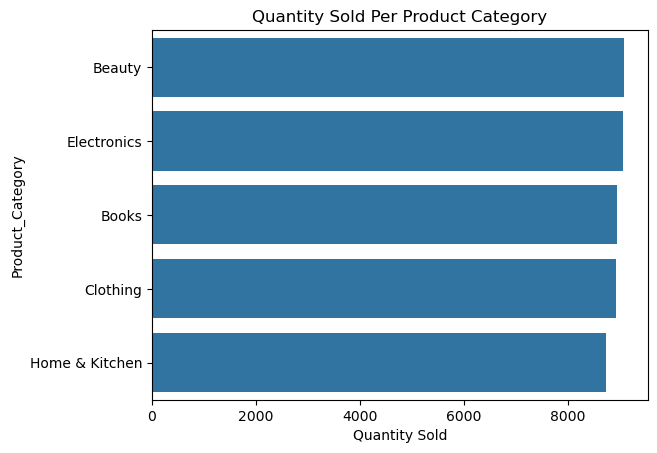

In [155]:
df3 = df.groupby('Product_Category', dropna = False)['Quantity'].sum().reset_index(name = 'Quantity Sold').sort_values('Quantity Sold', ascending = False)

print("\n" + "=" * 50)
print("QUANTITY SOLD PER PRODUCT CATEGORY TABLE")
print("=" * 50)
display(df3)
print("\n")
sns.barplot(x= df3['Quantity Sold'], y = df3['Product_Category'], orient = 'h')
plt.title("Quantity Sold Per Product Category")
plt.xlabel("Quantity Sold")
plt.show()

##### Sales per Product Category


SALES PER PRODUCT CATEGORY TABLE


,Product_Category,Total Sales
0,Beauty,2.274896e+08
3,Electronics,2.265649e+08
1,Books,2.249992e+08
2,Clothing,2.224093e+08
4,Home & Kitchen,2.166987e+08


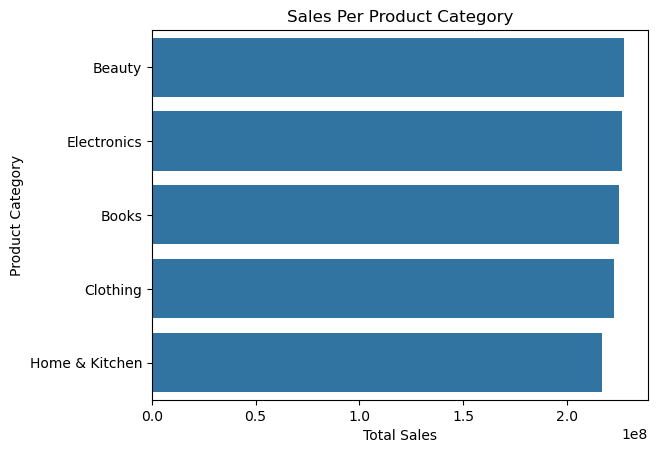

In [156]:
df4 = df.groupby('Product_Category', dropna = False)['Total_Sales_INR'].sum().reset_index(name = 'Total Sales').sort_values('Total Sales',ascending = False)

df4
print("\n" + "=" * 50)
print("SALES PER PRODUCT CATEGORY TABLE")
print("=" * 50)
display(df4)
print("\n")
sns.barplot(x= df4['Total Sales'], y = df4['Product_Category'], orient = 'h')
plt.title("Sales Per Product Category")
plt.ylabel("Product Category")
plt.show()

##### Orders Delivered Per Product Category


ORDERS DELIVERED PER PRODUCT CATEGORY TABLE


,Product_Category,Count
0,Beauty,1072
1,Books,1017
3,Electronics,1007
2,Clothing,991
4,Home & Kitchen,988


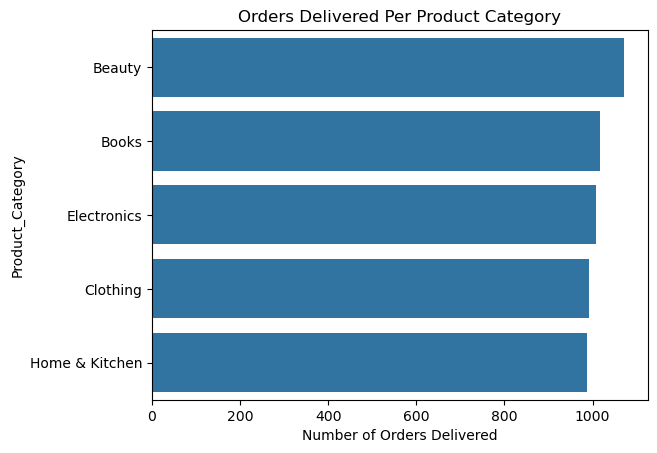

In [157]:
df5 = df[df['Delivery_Status'] == 'Delivered'].groupby('Product_Category', dropna = False)['Delivery_Status'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)
print("\n" + "=" * 50)
print("ORDERS DELIVERED PER PRODUCT CATEGORY TABLE")
print("=" * 50)
display(df5)
print("\n")
sns.barplot(x= df5['Count'], y = df5['Product_Category'], orient = 'h')
plt.title("Orders Delivered Per Product Category")
plt.xlabel("Number of Orders Delivered")
plt.show()

# Add data labels
#for container in ax.containers:
#    ax.bar_label(container, fmt = '%.2f')
    
#plt.show()

##### Orders Pending Per Product Category


PENDING ORDERS PER PRODUCT CATEGORY TABLE


,Product_Category,Count
2,Clothing,1049
3,Electronics,1023
4,Home & Kitchen,1012
1,Books,989
0,Beauty,971


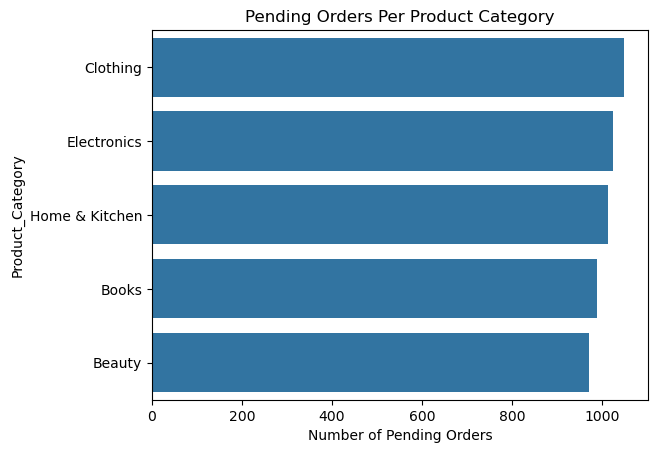

In [158]:
df9 = df[df['Delivery_Status'] == 'Pending'].groupby('Product_Category', dropna = False)['Delivery_Status'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)

# === Table heading and display of insight ====
print("\n" + "=" * 50)
print("PENDING ORDERS PER PRODUCT CATEGORY TABLE")
print("=" * 50)
display(df9)
print("\n")

# === Plotting of horizontal Bar Chart ====
sns.barplot(x= df9['Count'], y = df9['Product_Category'], orient = 'h')
plt.title("Pending Orders Per Product Category")
plt.xlabel("Number of Pending Orders")
plt.show()


##### Orders Returned Per Product Category


RETURNED ORDERS PER PRODUCT CATEGORY TABLE


,Product_Category,Count
1,Books,1029
3,Electronics,1006
2,Clothing,982
0,Beauty,954
4,Home & Kitchen,910


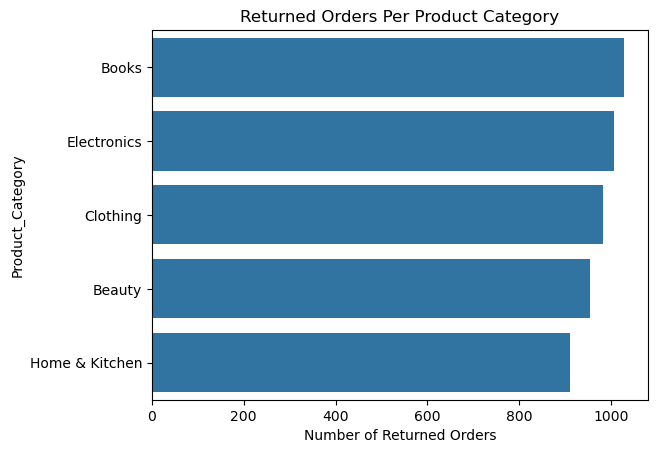

In [159]:
df11 = df[df['Delivery_Status'] == 'Returned'].groupby('Product_Category')['Delivery_Status'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)

# === Table heading and display of insight ====
print("\n" + "=" * 50)
print("RETURNED ORDERS PER PRODUCT CATEGORY TABLE")
print("=" * 50)
display(df11)
print("\n")

# === Plotting of horizontal Bar Chart ====
sns.barplot(x= df11['Count'], y = df11['Product_Category'], orient = 'h')
plt.title("Returned Orders Per Product Category")
plt.xlabel("Number of Returned Orders")
plt.show()


### Product Analysis


##### Profitable Products


TOP 10 SELLING PRODUCTS TABLE


,Product_Name,Total_Sales
12,Lipstick,48159020.15
2,Children's Book,48145664.52
8,Headphones,48044405.75
7,Hair Dryer,47428844.81
14,Perfume,46284732.62
11,Laptop,46173868.15
22,Tablet,46170022.15
20,Sneakers,46057295.93
0,Air Fryer,45919707.91
10,Jeans,45232819.47


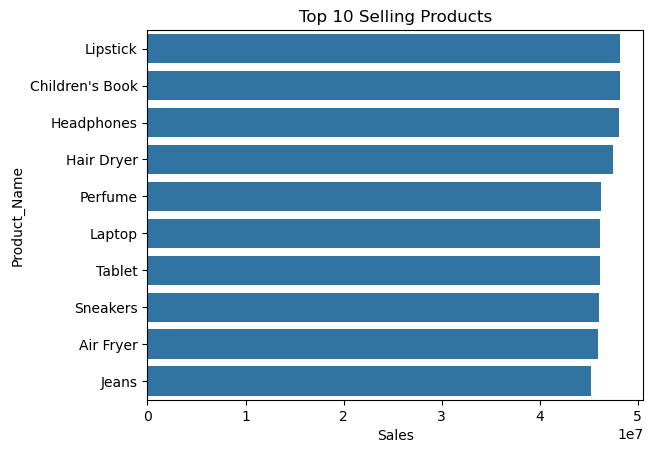

In [265]:
df6 = df.groupby('Product_Name')['Total_Sales_INR'].sum().reset_index(name = 'Total_Sales').sort_values('Total_Sales', ascending = False).head(10)

print("\n" + "=" * 50)
print("TOP 10 SELLING PRODUCTS TABLE")
print("=" * 50)
display(df6)
print("\n")
ax = sns.barplot(x= df6['Total_Sales'], y = df6['Product_Name'], orient = 'h')
plt.title("Top 10 Selling Products")
plt.xlabel("Sales")

# Add data labels
#for container in ax.containers:
#    ax.bar_label(container, fmt = '%.2f')
    
plt.show()

##### Total Quantity Per Products


TOP 10 PRODUCTS SOLD TABLE


,Product_Name,Quantity_Sold
14,Perfume,1887
2,Children's Book,1881
8,Headphones,1880
12,Lipstick,1871
7,Hair Dryer,1839
11,Laptop,1834
0,Air Fryer,1829
20,Sneakers,1824
19,Smartwatch,1822
10,Jeans,1808


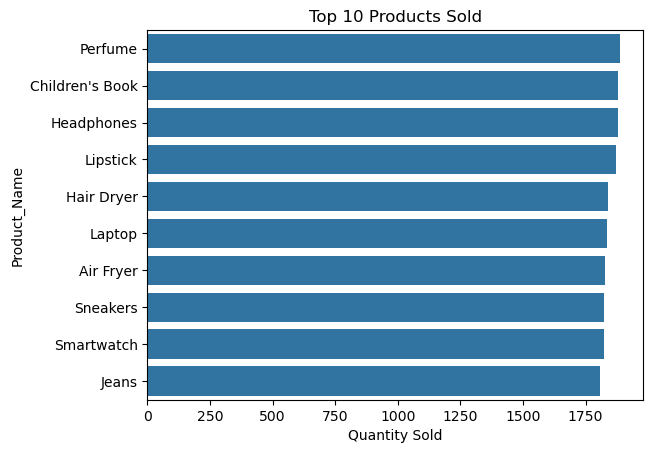

In [161]:
df7 = df.groupby('Product_Name')['Quantity'].sum().reset_index(name = 'Quantity_Sold').sort_values('Quantity_Sold', ascending = False).head(10)

print("\n" + "=" * 50)
print("TOP 10 PRODUCTS SOLD TABLE")
print("=" * 50)
display(df7)
print("\n")
sns.barplot(x= df7['Quantity_Sold'], y= df7['Product_Name'], orient = 'h')
plt.title("Top 10 Products Sold")
plt.xlabel("Quantity Sold")

plt.show()

##### Total Orders Per Product


TOP 10 PRODUCTS ORDERED TABLE


,Product_Name,Total_Orders
2,Children's Book,636
14,Perfume,629
16,Science Textbook,624
21,T-Shirt,623
11,Laptop,618
22,Tablet,616
19,Smartwatch,615
0,Air Fryer,614
8,Headphones,610
10,Jeans,604


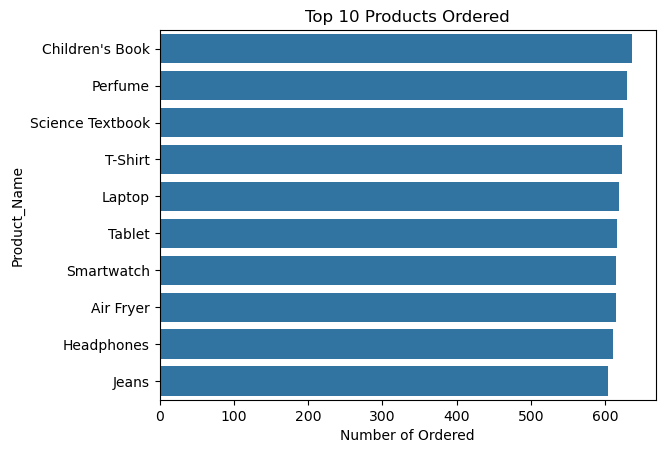

In [162]:
df8 = df.groupby('Product_Name')['Order_ID'].count().reset_index(name = 'Total_Orders').sort_values('Total_Orders', ascending = False).head(10)

print("\n" + "=" * 50)
print("TOP 10 PRODUCTS ORDERED TABLE")
print("=" * 50)
display(df8)
print("\n")
sns.barplot(x= df8['Total_Orders'], y= df8['Product_Name'], orient = 'h')
plt.title("Top 10 Products Ordered")
plt.xlabel("Number of Ordered")

plt.show()

##### Orders Delivered Per Products


TOP 10 PRODUCTS DELIVERED TABLE


,Product_Name,Count
14,Perfume,238
3,Comics,228
0,Air Fryer,221
13,Mixer Grinder,215
5,Face Cream,215
7,Hair Dryer,209
20,Sneakers,209
8,Headphones,209
17,Shampoo,206
9,Jacket,204


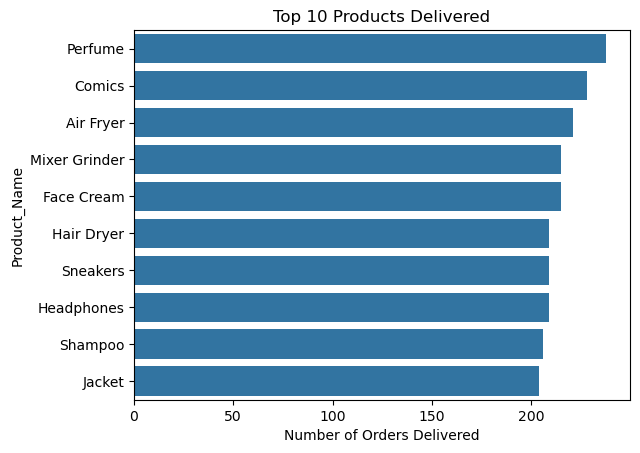

In [163]:
df10 = df[df['Delivery_Status'] == 'Delivered'].groupby('Product_Name')['Delivery_Status'].count().reset_index(name = 'Count').sort_values('Count', ascending = False).head(10)

# === Table heading and display of insight ====
print("\n" + "=" * 50)
print("TOP 10 PRODUCTS DELIVERED TABLE")
print("=" * 50)
display(df10)
print("\n")

# === Plotting of horizontal Bar Chart ====
sns.barplot(x= df10['Count'], y = df10['Product_Name'], orient = 'h')
plt.title("Top 10 Products Delivered")
plt.xlabel("Number of Orders Delivered")
plt.show()


##### Pending Orders Per Products


TOP 10 PRODUCTS WITH PENDING ORDERS TABLE


,Product_Name,Count
2,Children's Book,224
22,Tablet,223
11,Laptop,220
24,Water Purifier,218
4,Cookware Set,214
10,Jeans,213
15,Saree,213
9,Jacket,211
7,Hair Dryer,210
21,T-Shirt,210


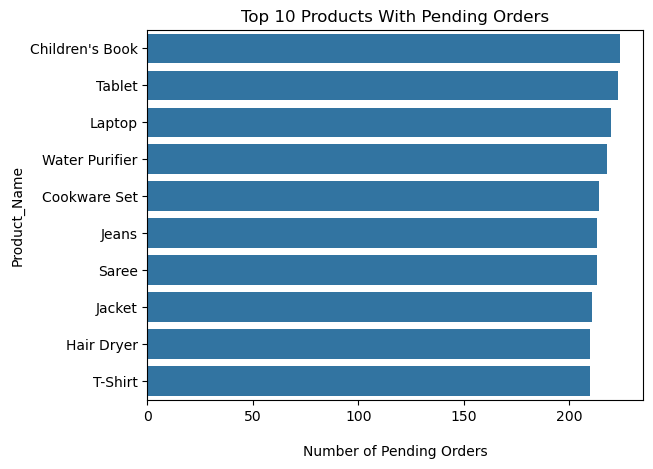

In [164]:
df12 = df[df['Delivery_Status'] == 'Pending'].groupby('Product_Name')['Delivery_Status'].count().reset_index(name = 'Count').sort_values('Count', ascending = False).head(10)

# === Table heading and display of insight ====
print("\n" + "=" * 50)
print("TOP 10 PRODUCTS WITH PENDING ORDERS TABLE")
print("=" * 50)
display(df12)
print("\n")

# === Plotting of horizontal Bar Chart ====
sns.barplot(x= df12['Count'], y = df12['Product_Name'], orient = 'h')
plt.title("Top 10 Products With Pending Orders")
plt.xlabel("\n" + "Number of Pending Orders")
plt.show()


##### Returned Orders Per Products


TOP 10 PRODUCTS RETURNED TABLE


,Product_Name,Count
16,Science Textbook,223
19,Smartwatch,220
21,T-Shirt,220
8,Headphones,214
2,Children's Book,214
6,Fiction Novel,203
14,Perfume,202
11,Laptop,200
0,Air Fryer,199
3,Comics,199


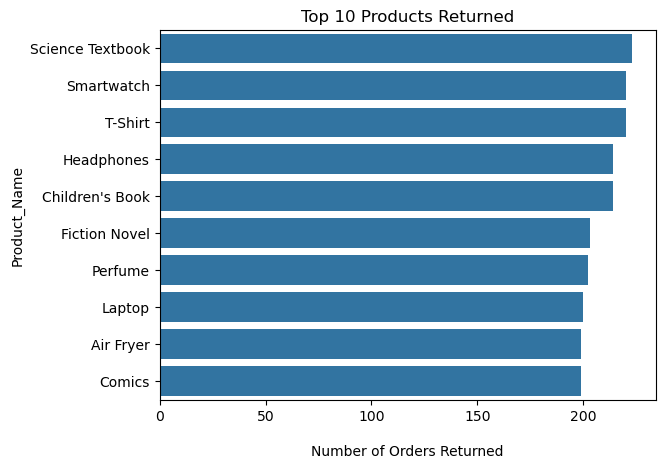

In [165]:
df13 = df[df['Delivery_Status'] == 'Returned'].groupby('Product_Name')['Delivery_Status'].count().reset_index(name = 'Count').sort_values('Count', ascending = False).head(10)

# === Table heading and display of insight ====
print("\n" + "=" * 50)
print("TOP 10 PRODUCTS RETURNED TABLE")
print("=" * 50)
display(df13)
print("\n")

# === Plotting of horizontal Bar Chart ====
sns.barplot(x= df13['Count'], y = df13['Product_Name'], orient = 'h')
plt.title("Top 10 Products Returned")
plt.xlabel("\n" + "Number of Orders Returned")
plt.show()


### Trend Analysis

#### Monthly Sales


MONTHLY SALES TABLE


,Month,Total_Sales
1,August,97576563.09
2,December,97467830.53
8,May,97195848.48
5,July,95176904.42
9,November,94809186.29
10,October,93478344.05
7,March,93064349.39
4,January,92051785.03
0,April,91388990.14
11,September,91225555.74


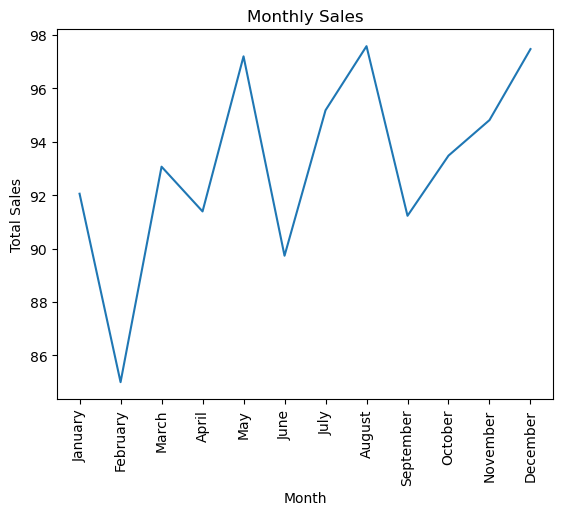

In [166]:
# === Sorting the months according to its normal arrangement ===
monthly_sales = df.groupby('Month').sum(
    'Total_Sales_INR'
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# === Monthly Sales Insight ====
df14 = df.groupby('Month')['Total_Sales_INR'].sum().reset_index(name = 'Total_Sales').sort_values('Total_Sales', ascending = False)

print("\n" + "=" * 50)
print("MONTHLY SALES TABLE")
print("=" * 50)
display(df14)
print("\n")

# === Plotting a line Chart ====
sns.lineplot(x = monthly_sales.index, y = monthly_sales['Total_Sales_INR']/1e6)
plt.title("Monthly Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation = 90)

plt.show()

#### Weekly Sales 


WEEKLY SALES TABLE


,Day,Total_Sales
1,Monday,1.639408e+08
3,Sunday,1.636732e+08
5,Tuesday,1.602607e+08
0,Friday,1.601457e+08
4,Thursday,1.587682e+08
2,Saturday,1.564529e+08
6,Wednesday,1.549203e+08


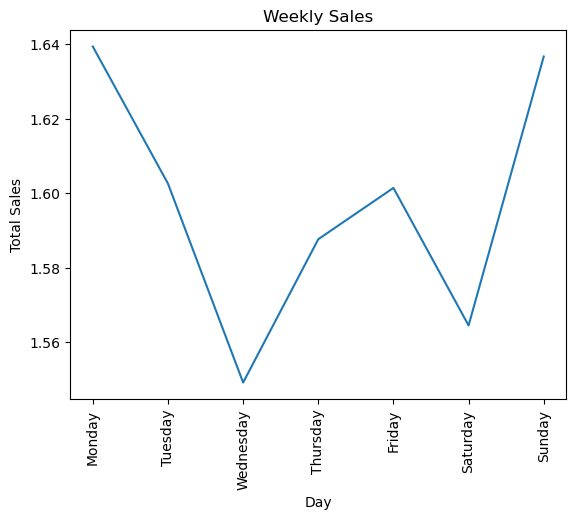

In [167]:
# === Sorting the days according to its normal arrangement ===
weekly_sales = df.groupby('Day').agg({
    'Total_Sales_INR': 'sum',
    'Order_ID': 'count'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# === Weekly Sales Insight ====
df15 = df.groupby('Day')['Total_Sales_INR'].sum().reset_index(name = 'Total_Sales').sort_values('Total_Sales', ascending = False)

print("\n" + "=" * 50)
print("WEEKLY SALES TABLE")
print("=" * 50)
display(df15)
print("\n")

# === Plotting a line Chart ====
sns.lineplot(x = weekly_sales.index, y = weekly_sales['Total_Sales_INR']/1e8)
plt.title("Weekly Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation = 90)

plt.show()

#### Monthly Orders 


MONTHLY ORDERS TABLE


,Month,Total_Orders
1,August,1312
5,July,1306
2,December,1296
4,January,1276
8,May,1267
11,September,1248
10,October,1233
7,March,1226
6,June,1225
9,November,1225


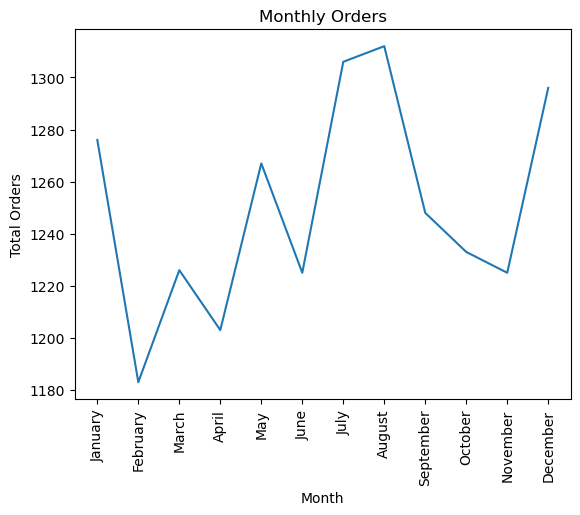

In [168]:
# === Sorting the months according to its normal arrangement ===
monthly_orders = df.groupby('Month').agg({
    'Order_ID': 'count'
}).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# === Monthly Orders Insight ====
df16 = df.groupby('Month')['Order_ID'].count().reset_index(name = 'Total_Orders').sort_values('Total_Orders', ascending = False)

print("\n" + "=" * 50)
print("MONTHLY ORDERS TABLE")
print("=" * 50)
display(df16)
print("\n")

# === Plotting a line Chart ====
sns.lineplot(x = monthly_orders.index, y = monthly_orders['Order_ID'])
plt.title("Monthly Orders")
plt.ylabel("Total Orders")
plt.xticks(rotation = 90)

plt.show()


WEEKLY ORDERS TABLE


,Day,Total_Orders
3,Sunday,2194
1,Monday,2192
0,Friday,2147
4,Thursday,2143
6,Wednesday,2135
5,Tuesday,2104
2,Saturday,2085


<function matplotlib.pyplot.show(close=None, block=None)>

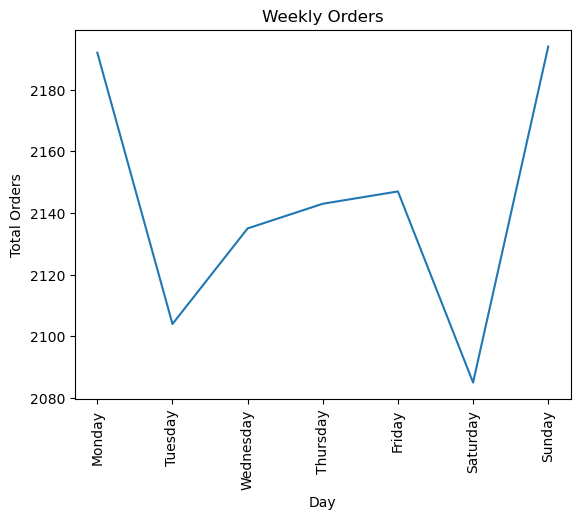

In [123]:
# === Sorting the days according to its normal arrangement ===
weekly_orders = df.groupby('Day').agg({
    'Order_ID': 'count'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# === Weekly Orders Insight ====
df17 = df.groupby('Day')['Order_ID'].count().reset_index(name = 'Total_Orders').sort_values('Total_Orders', ascending = False)

print("\n" + "=" * 50)
print("WEEKLY ORDERS TABLE")
print("=" * 50)
display(df17)
print("\n")

# === Plotting a line Chart ====
sns.lineplot(x = weekly_orders.index, y = weekly_orders['Order_ID'])
plt.title("Weekly Orders")
plt.ylabel("Total Orders")
plt.xticks(rotation = 90)

plt.show()

#### Monthly Quantity Sold


MONTHLY QUANTITY SOLD TABLE


,Month,Total_Qty_Sold
1,August,3950
2,December,3911
5,July,3861
8,May,3839
4,January,3787
9,November,3724
7,March,3689
10,October,3684
11,September,3637
6,June,3623


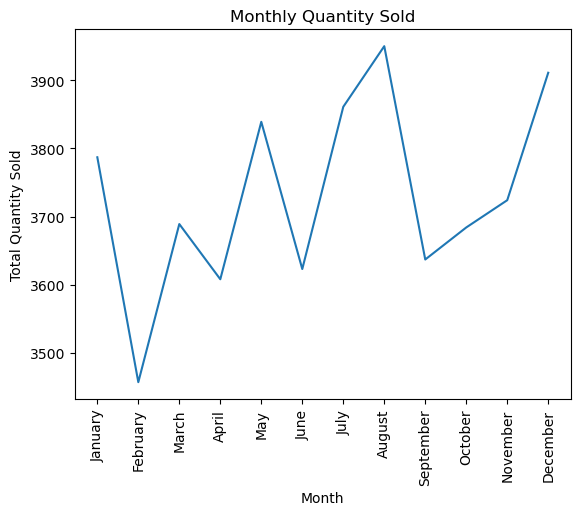

In [169]:
# === Sorting the months according to its normal arrangement ===
monthly_qty_sold = df.groupby('Month').agg({
    'Quantity': 'sum'
}).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# === Monthly Quantity Sold Insight ====
df18 = df.groupby('Month')['Quantity'].sum().reset_index(name = 'Total_Qty_Sold').sort_values('Total_Qty_Sold', ascending = False)

print("\n" + "=" * 50)
print("MONTHLY QUANTITY SOLD TABLE")
print("=" * 50)
display(df18)
print("\n")

# === Plotting a line Chart ====
sns.lineplot(x = monthly_qty_sold.index, y = monthly_qty_sold['Quantity'])
plt.title("Monthly Quantity Sold")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation = 90)

plt.show()


WEEKLY QUANTITY SOLD TABLE


,Day,Total_Qty_Sold
3,Sunday,6579
1,Monday,6545
4,Thursday,6489
0,Friday,6434
6,Wednesday,6365
5,Tuesday,6264
2,Saturday,6094


<function matplotlib.pyplot.show(close=None, block=None)>

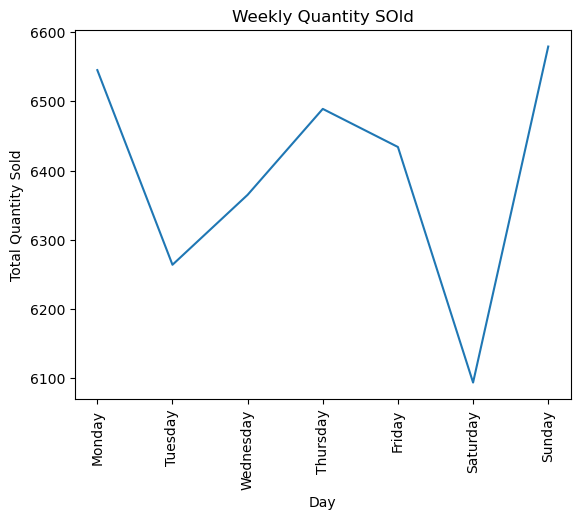

In [132]:
# === Sorting the days according to its normal arrangement ===
weekly_qty_sold = df.groupby('Day').agg({
    'Quantity': 'sum'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# === Weekly Quantity Sold Insight ====
df19 = df.groupby('Day')['Quantity'].sum().reset_index(name = 'Total_Qty_Sold').sort_values('Total_Qty_Sold', ascending = False)

print("\n" + "=" * 50)
print("WEEKLY QUANTITY SOLD TABLE")
print("=" * 50)
display(df19)
print("\n")

# === Plotting a line Chart ====
sns.lineplot(x = weekly_qty_sold.index, y = weekly_qty_sold['Quantity'])
plt.title("Weekly Quantity SOld")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation = 90)

plt.show()

##### Payment Method Weekly Trend Usage


WEEKLY PAYMENT METHOD USAGE COUNT TABLE


,Payment_Method,Total_Orders
0,Cash on Delivery,3827
1,Credit Card,3800
2,Debit Card,3727
3,UPI,3646


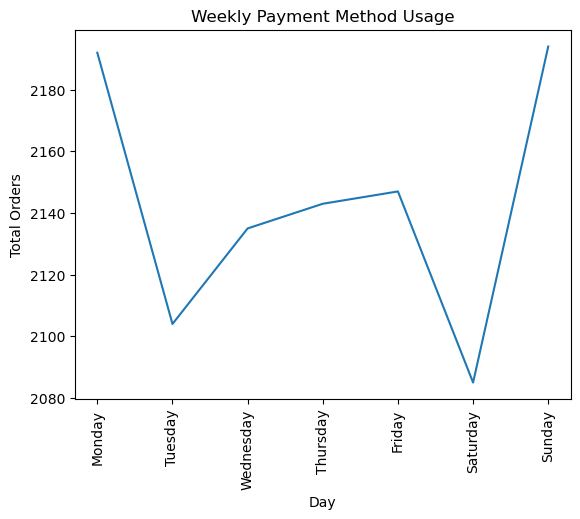

In [170]:
# === Sorting the days according to its normal arrangement ===
weekly_orders = df.groupby('Day').agg({
    'Order_ID': 'count'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# === Weekly Payment Method Usage ===
df21 = df.groupby('Payment_Method')['Order_ID'].count().reset_index(name = 'Total_Orders').sort_values('Total_Orders', ascending = False)

print("\n" + "=" * 50)
print("WEEKLY PAYMENT METHOD USAGE COUNT TABLE")
print("=" * 50)
display(df21)
print("\n")


# === Plotting a line Chart ===
sns.lineplot(x = weekly_orders.index, y = weekly_orders['Order_ID'])
plt.title("Weekly Payment Method Usage")
plt.ylabel("Total Orders")
plt.xticks(rotation = 90)

plt.show()

### Customer Payment Mode Preferences Analysis

##### Number Of Payment Method Usage


PAYMENT METHOD USAGE COUNT TABLE


,Payment_Method,No. Usage
0,Cash on Delivery,3827
1,Credit Card,3800
2,Debit Card,3727
3,UPI,3646


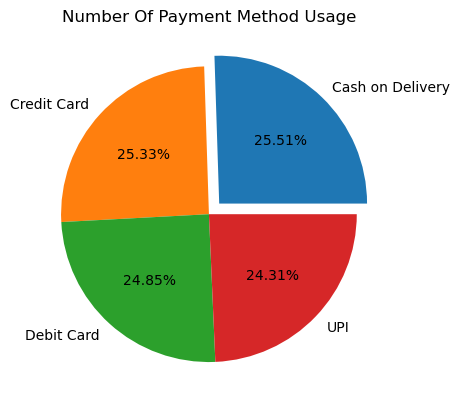

In [171]:
df19 = df.groupby('Payment_Method')['Order_ID'].count().reset_index(name = 'No. Usage').sort_values('No. Usage', ascending = False)

print("\n" + "=" * 50)
print("PAYMENT METHOD USAGE COUNT TABLE")
print("=" * 50)
display(df19)
print("\n")

# === Exploding the Highest Count ===
explode_list = [0.1] + [0] * (len(df19['No. Usage'].value_counts()) - 1)

# === Plotting a Pie Chart ===
plt.pie(df['Payment_Method'].value_counts(), labels = df['Payment_Method'].value_counts().index, explode = explode_list, autopct = '%1.2f%%')
plt.title("Number Of Payment Method Usage")
plt.show()

##### Sales Generated Via Payment Method


SALES GENERATED PER PAYMENT METHOD TABLE


Payment_Method
Credit Card         2.868892e+08
Cash on Delivery    2.865114e+08
Debit Card          2.730366e+08
UPI                 2.717245e+08
Name: Total_Sales_INR, dtype: float64

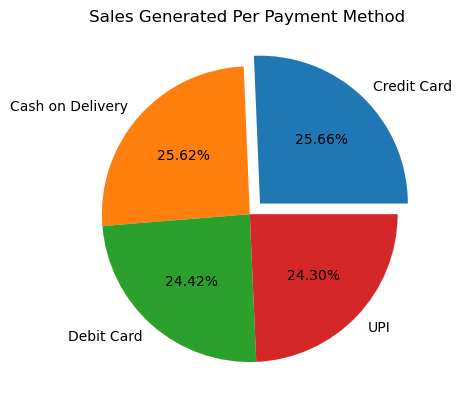

In [172]:
df20 = df.groupby('Payment_Method')['Total_Sales_INR'].sum().sort_values(ascending = False)



print("\n" + "=" * 50)
print("SALES GENERATED PER PAYMENT METHOD TABLE")
print("=" * 50)
display(df20)
print("\n")


# === Exploding the Highest Count ===
explode_list = [0.1] + [0] * (len(df['Payment_Method'].value_counts()) - 1)

# === Plotting a Pie Chart ===
plt.pie(df20, labels = df20.index, explode = explode_list, autopct = '%1.2f%%')
plt.title("Sales Generated Per Payment Method ")
plt.show()

##### Monthly Usage of Payment Method

,Total_Orders,Total_Sales,Avg_Sales,Total_Qty_Sold,Avg_Rating,Credit_Card,Cash_on_Delivery,Debit_Card,UPI
Month,,,,,,,,,
January,1276,92051785.03,72140.90,3787,3.06,321,337,312,306
February,1183,84995760.62,71847.64,3457,3.08,333,302,264,284
March,1226,93064349.39,75908.93,3689,3.08,315,333,302,276
April,1203,91388990.14,75967.57,3608,3.08,290,291,340,282
May,1267,97195848.48,76713.38,3839,2.98,314,320,309,324
June,1225,89730685.72,73249.54,3623,2.98,306,326,296,297
July,1306,95176904.42,72876.65,3861,3.04,321,327,313,345
August,1312,97576563.09,74372.38,3950,3.07,315,332,352,313
September,1248,91225555.74,73097.40,3637,3.02,327,291,308,322


,Credit_Card,Cash_on_Delivery,Debit_Card,UPI
Month,,,,
January,321,337,312,306
February,333,302,264,284
March,315,333,302,276
April,290,291,340,282
May,314,320,309,324
June,306,326,296,297
July,321,327,313,345
August,315,332,352,313
September,327,291,308,322


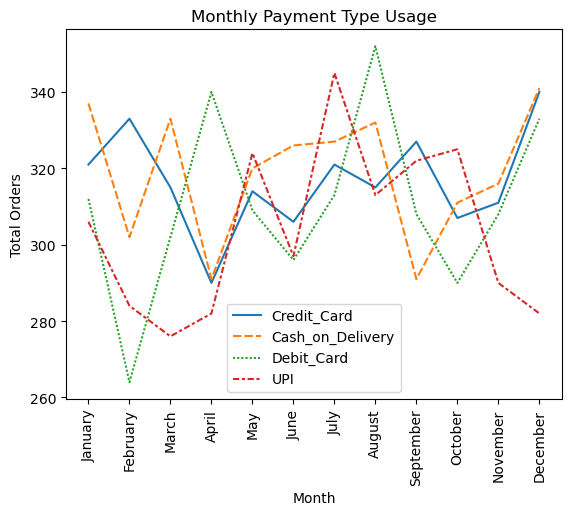

In [266]:
monthly_orders = df.groupby('Month').agg({
    'Order_ID': 'count'
}).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


# ==== Creating New Table for the monthly Analysis on Payment Method ==== 

monthly_stats = df.groupby('Month').agg({
    'Order_ID' : 'count',
    'Total_Sales_INR' : ['sum', 'mean'],
    'Quantity' : 'sum',
    'Review_Rating' : 'mean'
}).round(2).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

monthly_stats.columns = ['Total_Orders', 'Total_Sales', 'Avg_Sales', 'Total_Qty_Sold', 'Avg_Rating']


# === Adding New columns for each of the Payment methods per month ====

monthly_stats['Credit_Card'] = df[df['Payment_Method'] == 'Credit Card'].groupby('Month')['Payment_Method'].count()

monthly_stats['Cash_on_Delivery'] = df[df['Payment_Method'] == 'Cash on Delivery'].groupby('Month')['Payment_Method'].count()

monthly_stats['Debit_Card'] = df[df['Payment_Method'] == 'Debit Card'].groupby('Month')['Payment_Method'].count()

monthly_stats['UPI'] = df[df['Payment_Method'] == 'UPI'].groupby('Month')['Payment_Method'].count()

display(monthly_stats)

# === Retreiving columns needed to plot a line chart === 
df27 = monthly_stats.filter(items = ['Credit_Card', 'Cash_on_Delivery', 'Debit_Card', 'UPI'])

display(df27)

#df27.plot(kind = 'line')

print("\n")
#plt.title("Top 10 States Per Payment Method Distribution")
#plt.xlabel("Months")

sns.lineplot(df27)
plt.title("Monthly Payment Type Usage")
plt.ylabel("Total Orders")
plt.xticks(rotation = 90)

plt.show()





##### Weekly Payment Method Usage

,Total_Orders,Total_Sales,Avg_Sales,Total_Qty_Sold,Avg_Rating,Credit_Card,Cash_on_Delivery,Debit_Card,UPI
Day,,,,,,,,,
Monday,2192,1.639408e+08,74790.50,6545,3.07,573,559,532,528
Tuesday,2104,1.602607e+08,76169.51,6264,3.04,526,539,514,525
Wednesday,2135,1.549203e+08,72562.19,6365,3.01,548,543,521,523
Thursday,2143,1.587682e+08,74086.89,6489,3.01,557,570,503,513
Friday,2147,1.601457e+08,74590.47,6434,3.05,552,555,546,494
Saturday,2085,1.564529e+08,75037.37,6094,3.07,526,499,542,518
Sunday,2194,1.636732e+08,74600.39,6579,3.02,518,562,569,545


,Credit_Card,Cash_on_Delivery,Debit_Card,UPI
Day,,,,
Monday,573,559,532,528
Tuesday,526,539,514,525
Wednesday,548,543,521,523
Thursday,557,570,503,513
Friday,552,555,546,494
Saturday,526,499,542,518
Sunday,518,562,569,545


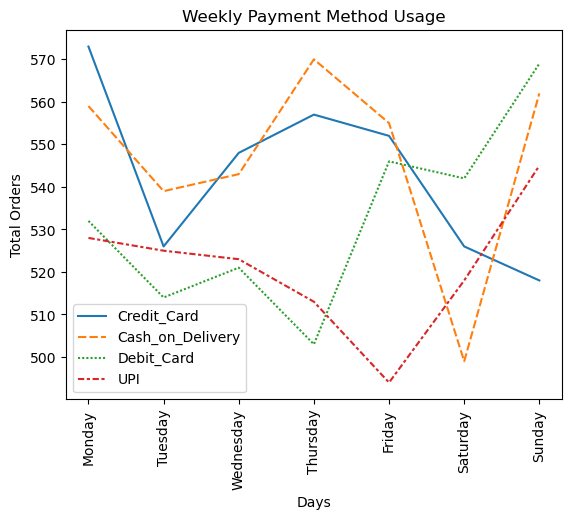

In [267]:
weekly_orders = df.groupby('Day').agg({
    'Order_ID': 'count'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# ==== Creating New Table for the monthly Analysis on Payment Method ==== 

weekly_stats = df.groupby('Day').agg({
    'Order_ID' : 'count',
    'Total_Sales_INR' : ['sum', 'mean'],
    'Quantity' : 'sum',
    'Review_Rating' : 'mean'
}).round(2).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekly_stats.columns = ['Total_Orders', 'Total_Sales', 'Avg_Sales', 'Total_Qty_Sold', 'Avg_Rating']


# === Adding New columns for each of the Payment methods per month ====

weekly_stats['Credit_Card'] = df[df['Payment_Method'] == 'Credit Card'].groupby('Day')['Payment_Method'].count()

weekly_stats['Cash_on_Delivery'] = df[df['Payment_Method'] == 'Cash on Delivery'].groupby('Day')['Payment_Method'].count()

weekly_stats['Debit_Card'] = df[df['Payment_Method'] == 'Debit Card'].groupby('Day')['Payment_Method'].count()

weekly_stats['UPI'] = df[df['Payment_Method'] == 'UPI'].groupby('Day')['Payment_Method'].count()

display(weekly_stats)

# === Retreiving columns needed to plot a line chart === 
df28 = weekly_stats.filter(items = ['Credit_Card', 'Cash_on_Delivery', 'Debit_Card', 'UPI'])

display(df28)

#df27.plot(kind = 'line')

print("\n")
#plt.title("Top 10 States Per Payment Method Distribution")
#plt.xlabel("Months")

sns.lineplot(df28)
plt.title("Weekly Payment Method Usage")
plt.xlabel("Days")
plt.ylabel("Total Orders")
plt.xticks(rotation = 90)

plt.show()



### Geographical Analysis

##### Sales Generated Per States


TOP 10 STATES PER SALES TABLE


,State,Total Sales
21,Sikkim,43113469.51
20,Rajasthan,42906175.08
4,Chhattisgarh,42857545.27
15,Meghalaya,42773152.96
22,Tamil Nadu,41967968.99
25,Uttar Pradesh,41690917.07
3,Bihar,41669240.44
27,West Bengal,41195932.45
24,Tripura,41103376.81
18,Odisha,40924381.38


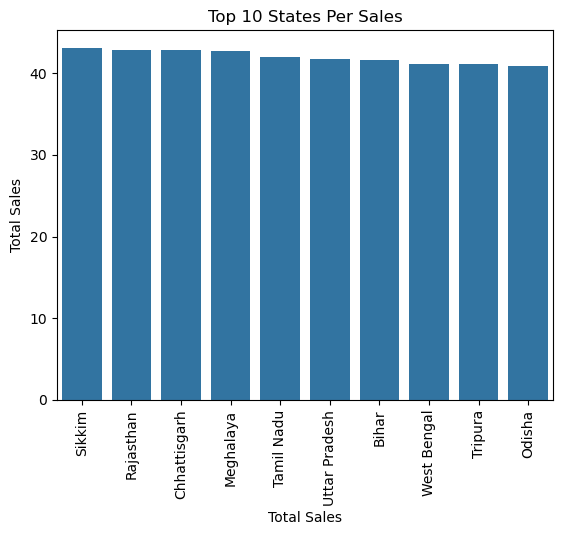

In [243]:
df22 = df.groupby('State')['Total_Sales_INR'].sum().reset_index(name = 'Total Sales').sort_values('Total Sales', ascending = False).head(10)

print("\n" + "=" * 50)
print("TOP 10 STATES PER SALES TABLE")
print("=" * 50)
display(df22)
print("\n")
sns.barplot(x= df22['State'], y= df22['Total Sales']/1e6)
plt.title("Top 10 States Per Sales")
plt.xlabel("Total Sales")
plt.xticks(rotation = 90)

plt.show()

##### Total Orders Per States


TOP 10 STATES PER ORDERS TABLE


,State,Total Orders
21,Sikkim,596
20,Rajasthan,568
22,Tamil Nadu,567
15,Meghalaya,559
4,Chhattisgarh,556
14,Manipur,555
2,Assam,553
25,Uttar Pradesh,551
12,Madhya Pradesh,550
3,Bihar,549


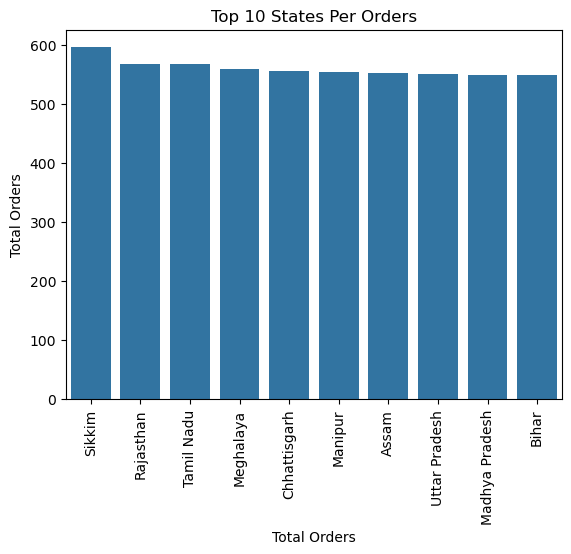

In [175]:
df23 = df.groupby('State')['Order_ID'].count().reset_index(name = 'Total Orders').sort_values('Total Orders', ascending = False).head(10)

print("\n" + "=" * 50)
print("TOP 10 STATES PER ORDERS TABLE")
print("=" * 50)
display(df23)
print("\n")
sns.barplot(x= df23['State'], y= df23['Total Orders'])
plt.title("Top 10 States Per Orders")
plt.xlabel("Total Orders")
plt.xticks(rotation = 90)

plt.show()

##### Total Quantity Sold Per States


TOP 10 STATES PER QUANTITY SOLD TABLE


,State,Quantity_Sold
21,Sikkim,1753
22,Tamil Nadu,1741
15,Meghalaya,1707
25,Uttar Pradesh,1692
4,Chhattisgarh,1680
20,Rajasthan,1676
12,Madhya Pradesh,1670
3,Bihar,1653
9,Jharkhand,1630
2,Assam,1619


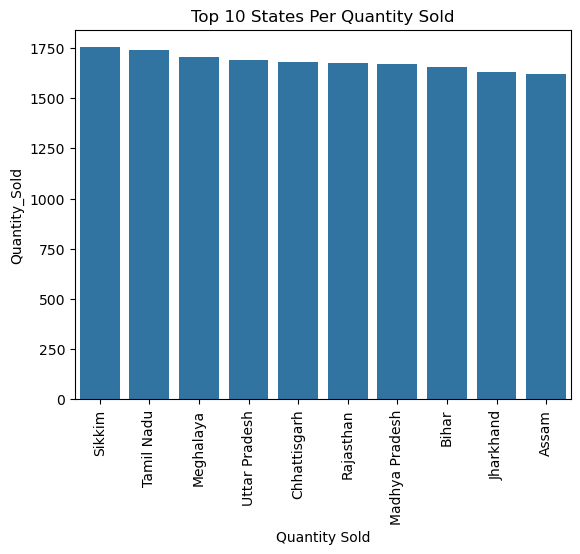

In [176]:
df24 = df.groupby('State')['Quantity'].sum().reset_index(name = 'Quantity_Sold').sort_values('Quantity_Sold', ascending = False).head(10)


print("\n" + "=" * 50)
print("TOP 10 STATES PER QUANTITY SOLD TABLE")
print("=" * 50)
display(df24)
print("\n")

# Plotting a Bar Chart
sns.barplot(x= df24['State'], y= df24['Quantity_Sold'])
plt.title("Top 10 States Per Quantity Sold")
plt.xlabel("Quantity Sold")
plt.xticks(rotation = 90)

plt.show()

##### Payment Method Usage Per States

,Total_Orders,Total_Sales,Avg_Sales,Total_Qty_Sold,Avg_Rating,Credit_Card,Cash_on_Delivery,Debit_Card,UPI
State,,,,,,,,,
Sikkim,596,43113469.51,72338.04,1753,3.02,164,134,160,138
Rajasthan,568,42906175.08,75539.04,1676,3.11,141,143,123,161
Tamil Nadu,567,41967968.99,74017.58,1741,3.02,126,145,143,153
Meghalaya,559,42773152.96,76517.27,1707,2.96,121,150,157,131
Chhattisgarh,556,42857545.27,77081.92,1680,2.94,151,150,138,117
Manipur,555,39934040.52,71953.23,1610,3.09,134,125,146,150
Assam,553,38739460.17,70053.27,1619,3.01,145,138,132,138
Uttar Pradesh,551,41690917.07,75664.10,1692,2.99,122,144,149,136
Madhya Pradesh,550,39961650.61,72657.55,1670,3.00,127,146,119,158


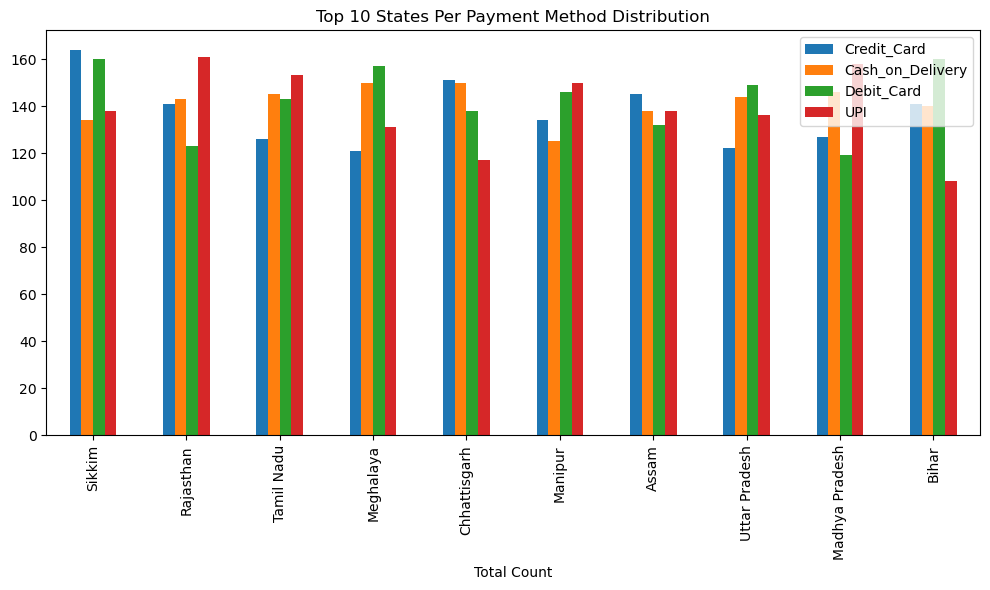

In [319]:
# ==== Creating New Table for the State Analysis on thier usage of Payment Method ==== 

state_stats = df.groupby('State').agg({
    'Order_ID' : 'count',
    'Total_Sales_INR' : ['sum', 'mean'],
    'Quantity' : 'sum',
    'Review_Rating' : 'mean'
}).round(2)

state_stats.columns = ['Total_Orders', 'Total_Sales', 'Avg_Sales', 'Total_Qty_Sold', 'Avg_Rating']

state_stats = state_stats.sort_values('Total_Orders', ascending = False).head(10)

# === Adding New columns for each of the Payment methods per state ====

state_stats['Credit_Card'] = df[df['Payment_Method'] == 'Credit Card'].groupby('State')['Payment_Method'].count()

state_stats['Cash_on_Delivery'] = df[df['Payment_Method'] == 'Cash on Delivery'].groupby('State')['Payment_Method'].count()

state_stats['Debit_Card'] = df[df['Payment_Method'] == 'Debit Card'].groupby('State')['Payment_Method'].count()

state_stats['UPI'] = df[df['Payment_Method'] == 'UPI'].groupby('State')['Payment_Method'].count()


display(state_stats)

# === Retreiving columns needed to plot the clustered bar chart === 
df26 = state_stats.filter(items = ['Credit_Card', 'Cash_on_Delivery', 'Debit_Card', 'UPI'])


# Plotting a stacked bar chart to show the distribution of payment method per state ====
df26.plot(kind = 'bar', stacked = False, figsize = (10, 6))

print("\n")
plt.title("Top 10 States Per Payment Method Distribution")
plt.xlabel("Total Count")
plt.tight_layout()
plt.xticks(rotation = 90)

plt.show()

##### Delivery Status Per States

,Total_Orders,Delivered,Pending,Returned
State,,,,
Sikkim,596,208,195,193
Rajasthan,568,189,190,189
Tamil Nadu,567,192,184,191
Meghalaya,559,196,176,187
Chhattisgarh,556,206,166,184
Manipur,555,171,196,188
Assam,553,161,191,201
Uttar Pradesh,551,189,166,196
Madhya Pradesh,550,197,182,171


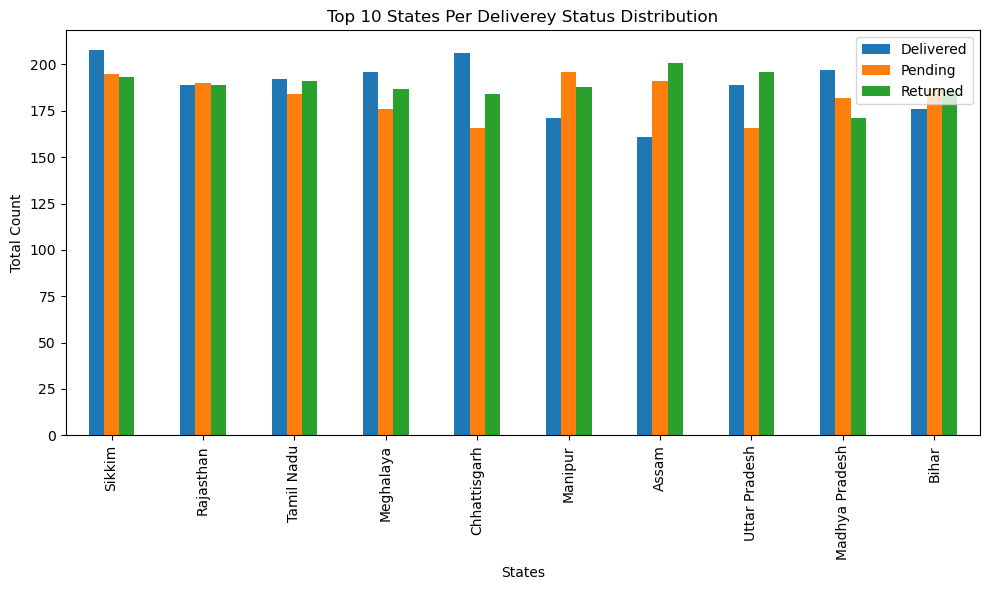

In [318]:
# ==== Creating New Table for the State Analysis on thier usage of Payment Method ==== 

state_stats = df.groupby('State').agg({
    'Order_ID' : 'count'
}).round(2)

state_stats.columns = ['Total_Orders']

state_stats = state_stats.sort_values('Total_Orders', ascending = False).head(10)

# === Adding New columns for each of the Payment methods per state ====


state_stats['Delivered'] = df[df['Delivery_Status'] == 'Delivered'].groupby('State')['Payment_Method'].count()

state_stats['Pending'] = df[df['Delivery_Status'] == 'Pending'].groupby('State')['Payment_Method'].count()

state_stats['Returned'] = df[df['Delivery_Status'] == 'Returned'].groupby('State')['Payment_Method'].count()

display(state_stats)

# === Retreiving columns needed to plot the clustered bar chart === 
df26 = state_stats.filter(items = ['Delivered', 'Pending', 'Returned'])


# Plotting a stacked bar chart to show the distribution of payment method per state ====
df26.plot(kind = 'bar', stacked = False, figsize = (10, 6))

print("\n")
plt.title("Top 10 States Per Deliverey Status Distribution")
plt.xlabel("States")
plt.ylabel("Total Count")
plt.tight_layout()
plt.xticks(rotation = 90)

plt.show()

### Customer Retention & Satisfaction Analysis

##### Customer Retention

In [293]:
customer_retention = df.groupby('Customer_ID').agg({
    'Repeated_Customer' : 'count',
    'Review_Rating' : 'mean',
    'Quantity' : 'sum',
    'Customer_Lifetime_Value' : 'mean'
}).round(2)

customer_retention.columns = [ 'Number_of_Purchases', 'Avg_Rating', 'Quantity_Sold', 'Lifetime_Value']

customer_retention = customer_retention.sort_values(['Number_of_Purchases', 'Avg_Rating'], ascending = False).head(20)

display(customer_retention)

,Number_of_Purchases,Avg_Rating,Quantity_Sold,Lifetime_Value
Customer_ID,,,,
CUST4795,8,4.00,23,630607.10
CUST9938,7,4.29,18,509537.03
CUST4143,7,3.43,19,395650.65
CUST8306,7,3.43,24,622213.40
CUST2813,7,3.14,25,632848.16
CUST4863,7,3.14,25,590396.73
CUST7903,7,3.14,24,875139.13
CUST2175,7,3.00,19,521797.46
CUST4366,7,3.00,23,723331.82


## Thank you for exploring this 2025 Amazon Diwali Sales Analysis notebook. Your time and support mean a lot 🙏
## If you found this analysis insightful, don’t forget to hit ⭐, comment, and share your feedback!